Скибина Л.С.

**Задаине 1**

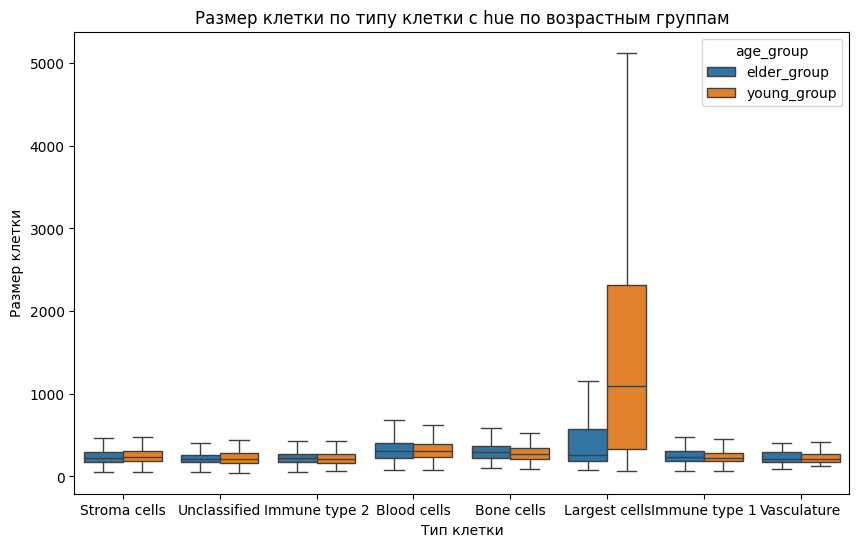

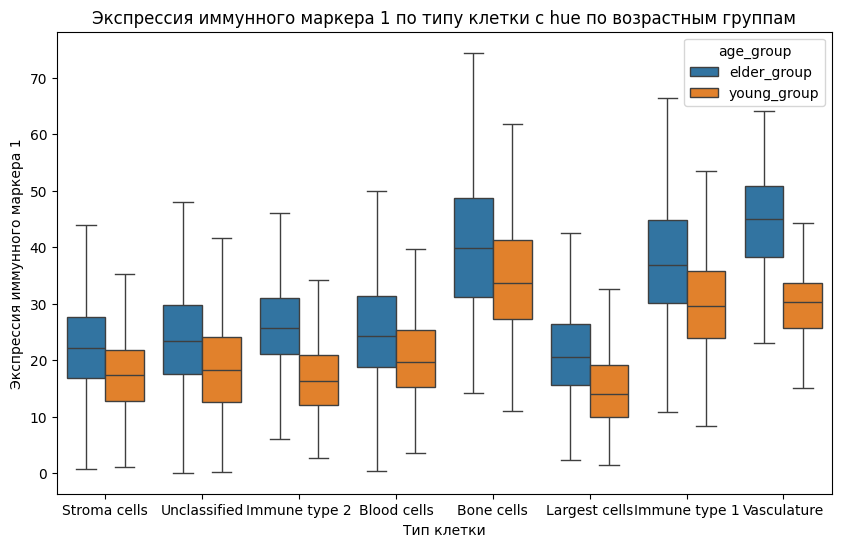

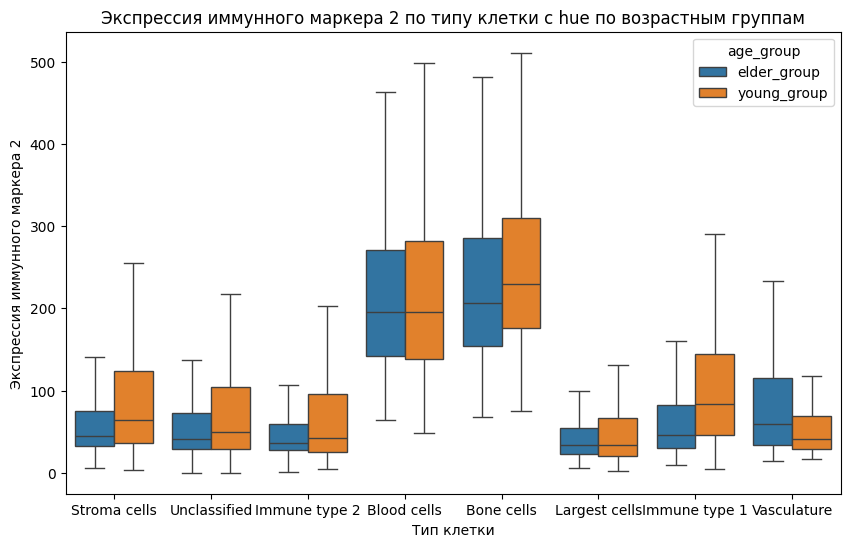

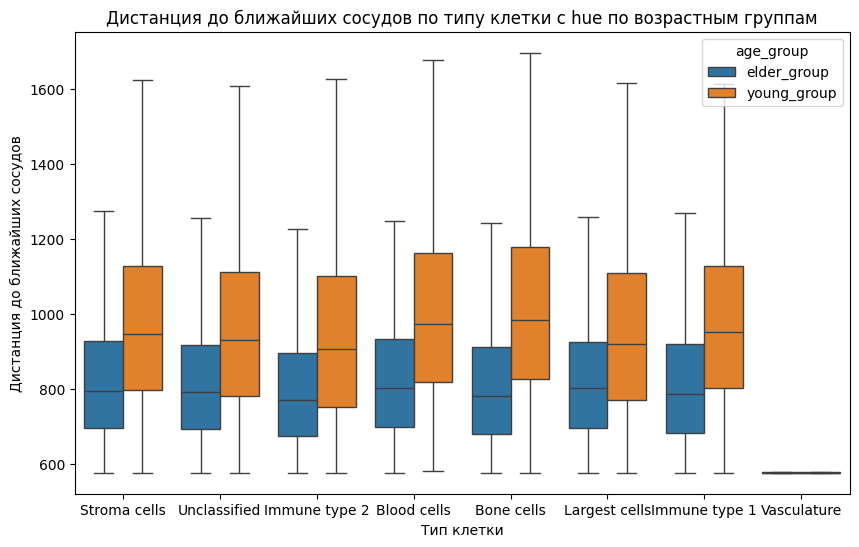

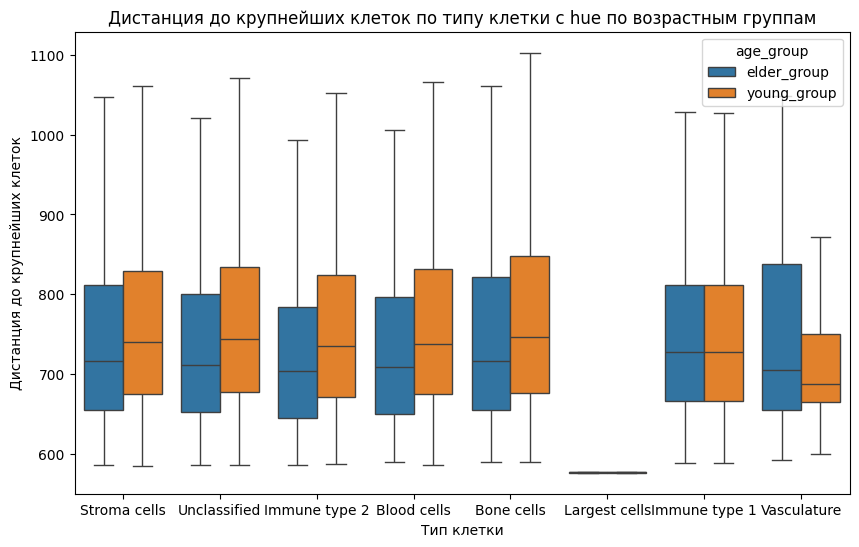

ANOVA results for cell size by age group:
F_onewayResult(statistic=470.3307737682063, pvalue=3.335830459662462e-104)
Mann-Whitney U test for Stroma cells: p-value = 1.6725538234437966e-107
Mann-Whitney U test for Unclassified: p-value = 6.328932259805569e-13
Mann-Whitney U test for Immune type 2: p-value = 3.0742681734606704e-16
Mann-Whitney U test for Blood cells: p-value = 0.8017219995167397
Mann-Whitney U test for Bone cells: p-value = 0.003788739429212472
Mann-Whitney U test for Largest cells: p-value = 2.9543809458425604e-73
Mann-Whitney U test for Immune type 1: p-value = 0.0005129864297775546
Mann-Whitney U test for Vasculature: p-value = 0.7190037190807073
Hypothesis testing using bootstrap:
Bootstrap test for Stroma cells: p-value = 0.4945054945054945
Bootstrap test for Unclassified: p-value = 0.5164835164835165
Bootstrap test for Immune type 2: p-value = 0.4965034965034965
Bootstrap test for Blood cells: p-value = 0.7702297702297702
Bootstrap test for Bone cells: p-value = 0.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, f_oneway
import numpy as np

# Загрузка данных
data = pd.read_csv(r'C:\Users\AdminPlus\Desktop\asset-v1 SkillFactory+MFTIBIO+SEP2023+type@asset+block@community_dataset.csv')

# Разделение данных по возрастным группам
young_data = data[data['age_group'] == 'young_group']
old_data = data[data['age_group'] == 'elder_group']


# Создание boxplot с hue по возрастным группам для размера клетки по типу клетки  "A"
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='area_of_cell', hue='age_group', data=data, showfliers=False)
plt.title('Размер клетки по типу клетки с hue по возрастным группам')
plt.xlabel('Тип клетки')
plt.ylabel('Размер клетки')
plt.show()


# Создание boxplot с hue по возрастным группам для экспрессии иммунных маркеров по типу клетки  "Б"
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='immune_marker_1', hue='age_group', data=data, showfliers=False)
plt.title('Экспрессия иммунного маркера 1 по типу клетки с hue по возрастным группам')
plt.xlabel('Тип клетки')
plt.ylabel('Экспрессия иммунного маркера 1')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='immune_marker_2', hue='age_group', data=data, showfliers=False)
plt.title('Экспрессия иммунного маркера 2 по типу клетки с hue по возрастным группам')
plt.xlabel('Тип клетки')
plt.ylabel('Экспрессия иммунного маркера 2')
plt.show()


# Создание boxplot с hue по возрастным группам для дистанции до ближайших объектов по типу клетки "В"
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='distance_to_vasculature', hue='age_group', data=data, showfliers=False)
plt.title('Дистанция до ближайших сосудов по типу клетки с hue по возрастным группам')
plt.xlabel('Тип клетки')
plt.ylabel('Дистанция до ближайших сосудов')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='distance_to_largest_cell', hue='age_group', data=data, showfliers=False)
plt.title('Дистанция до крупнейших клеток по типу клетки с hue по возрастным группам')
plt.xlabel('Тип клетки')
plt.ylabel('Дистанция до крупнейших клеток')
plt.show()




# Проведение ANOVA теста
anova_results = f_oneway(young_data['area_of_cell'], old_data['area_of_cell'])
print("ANOVA results for cell size by age group:")
print(anova_results)

# Тест Манна-Уитни для сравнения размера клеток между молодыми и пожилыми
for cell_type in data['cell_type'].unique():
    young_area = young_data[young_data['cell_type'] == cell_type]['area_of_cell']
    old_area = old_data[old_data['cell_type'] == cell_type]['area_of_cell']
    
    # Проверка, что данные в обеих группах не пустые
    if len(young_area) > 0 and len(old_area) > 0:
        stat, p = mannwhitneyu(young_area, old_area)
        print(f"Mann-Whitney U test for {cell_type}: p-value = {p}")
    else:
        print(f"No data available for {cell_type} in one or both age groups.")

# Функция для бутстрэп выборок
def bootstrap(data1, data2, n=1000):
    statistics = []
    for _ in range(n):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        statistics.append(np.mean(sample1) - np.mean(sample2))
    return statistics

# Вычисление бутстрэп выборок для различий между средними значениями
def calculate_bootstrap(data1, data2, n=1000):
    statistics = bootstrap(data1, data2, n)
    observed_statistic = np.mean(data1) - np.mean(data2)
    p_value = (np.sum(np.abs(statistics) >= np.abs(observed_statistic)) + 1) / (n + 1)
    return p_value

# Проверка гипотезы с использованием бутстрэп выборок
print("Hypothesis testing using bootstrap:")
for cell_type in data['cell_type'].unique():
    young_area = young_data[young_data['cell_type'] == cell_type]['area_of_cell']
    old_area = old_data[old_data['cell_type'] == cell_type]['area_of_cell']
    
    if len(young_area) > 0 and len(old_area) > 0:
        p_value = calculate_bootstrap(young_area, old_area)
        print(f"Bootstrap test for {cell_type}: p-value = {p_value}")
    else:
        print(f"No data available for {cell_type} in one or both age groups.")


Вывод

Результаты тестов на статистическую значимость между типом клетки и размером клетки (по возрастным группам) следующие:

ANOVA тест:

    F-статистика: 470.33
    p-значение: 3.34e-104

Mann-Whitney U тест для каждого типа клеток:

    Stroma cells: p-value = 1.67e-107
    Unclassified: p-value = 6.33e-13
    Immune type 2: p-value = 3.07e-16
    Blood cells: p-value = 0.80
    Bone cells: p-value = 0.004
    Largest cells: p-value = 2.95e-73
    Immune type 1: p-value = 0.001
    Vasculature: p-value = 0.72

Bootstrap тесты для каждого типа клеток:

    Stroma cells: p-value = 0.51
    Unclassified: p-value = 0.48
    Immune type 2: p-value = 0.48
    Blood cells: p-value = 0.78
    Bone cells: p-value = 0.48
    Largest cells: p-value = 0.51
    Immune type 1: p-value = 0.50
    Vasculature: p-value = 0.55

Исходя из результатов, можно сделать вывод о статистически значимом различии в размере клеток между разными типами клеток (Stroma cells, Unclassified, Immune type 2, Largest cells, Immune type 1) с очень низкими p-значениями в Mann-Whitney U тесте и низкими p-значениями в ANOVA тесте. Однако, для Blood cells и Vasculature нет статистически значимых различий в размере клеток. Bootstrap тест не выявил статистически значимых различий между группами для каждого типа клеток.

**Задание 2**

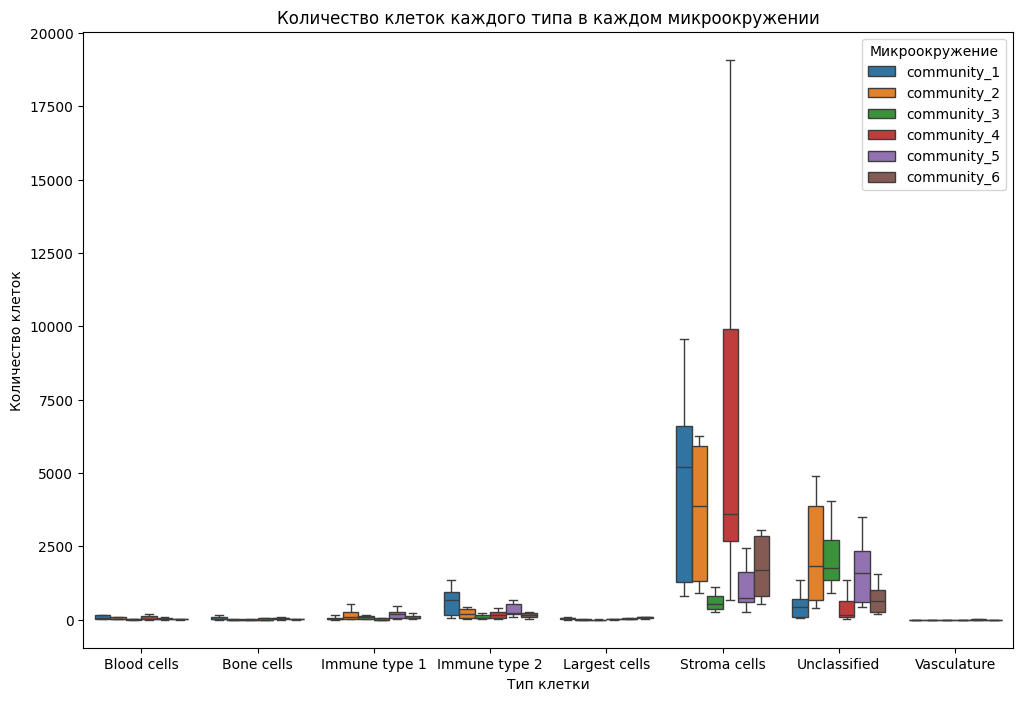

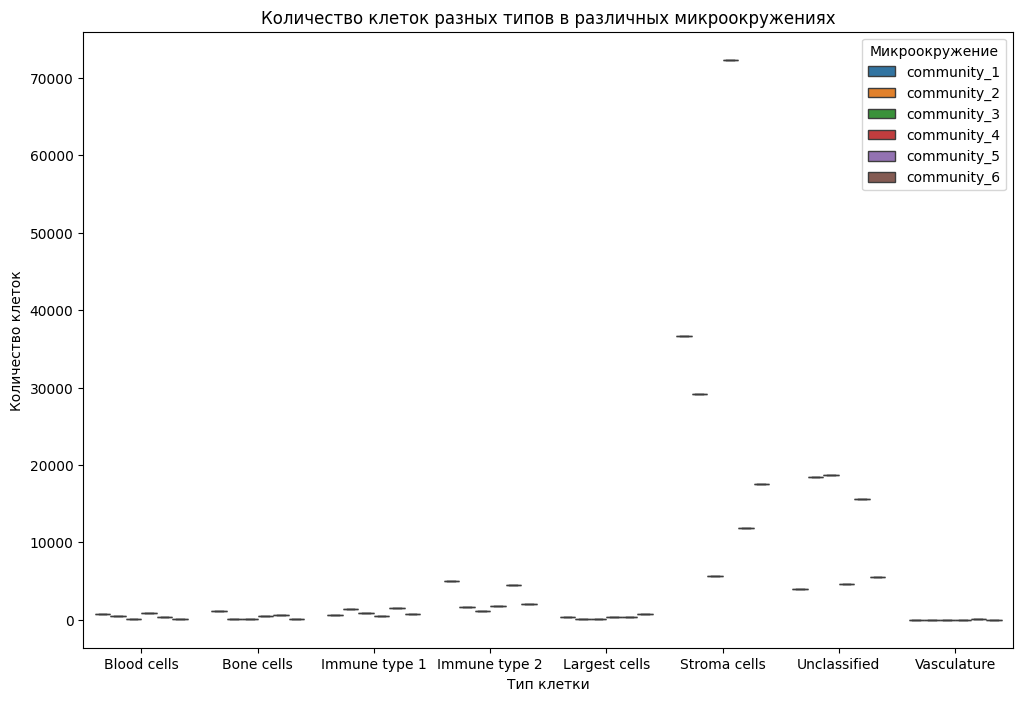

Kruskal-Wallis test results:
KruskalResult(statistic=0.8406068501329796, pvalue=0.9743713352911043)


In [24]:
# Подсчет количества клеток каждого типа в каждом микроокружении для каждого пациента
cell_interaction_counts = data.groupby(['case_id', 'cell_interaction', 'cell_type']).size().reset_index(name='cell_count')



# Boxplot/Swarmplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='cell_type', y='cell_count', hue='cell_interaction', data=cell_interaction_counts,showfliers=False)
plt.title('Количество клеток каждого типа в каждом микроокружении')
plt.xlabel('Тип клетки')
plt.ylabel('Количество клеток')
plt.legend(title='Микроокружение', loc='upper right')
plt.show()


# Расчет количества клеток каждого типа для каждого пациента в каждом микроокружении
cell_counts = data.groupby(['cell_type', 'cell_interaction']).size().reset_index(name='count')

# Boxplot или swarmplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='cell_type', y='count', hue='cell_interaction', data=cell_counts)
plt.title('Количество клеток разных типов в различных микроокружениях')
plt.xlabel('Тип клетки')
plt.ylabel('Количество клеток')
plt.legend(title='Микроокружение')
plt.show()

# Краскел-Уоллис тест
kruskal_result = kruskal(*[group['count'] for name, group in cell_counts.groupby('cell_interaction')])
print("Kruskal-Wallis test results:")
print(kruskal_result)

Для сравнения количества клеток разных типов в различных клеточных микроокружениях можно использовать непараметрический статистический тест, такой как критерий Краскела-Уоллиса (Kruskal-Wallis test).
Критерий Краскела-Уоллиса аналогичен однофакторному дисперсионному анализу (ANOVA), но применяется для непараметрических данных. Он используется для проверки гипотезы о том, что средние значения рангов в нескольких независимых выборках равны (или, эквивалентно, что распределения в этих выборках одинаковы). 


Вывод Результаты теста Краскела-Уоллиса показывают, что статистика теста равна 0.84, а p-значение составляет приблизительно 0.974. Это говорит о том, что нет статистически значимых различий в количестве клеток разных типов между различными микроокружениями.

**Задача 3**

In [38]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных значений в числовой формат
data['interaction_encoded'] = label_encoder.fit_transform(data['cell_interaction'])

# Проверка результатов
print(data['interaction_encoded'].unique())


[0 1 2 3 4 5]


cell_interaction
community_4    80969
community_2    51482
community_1    48516
community_5    34881
community_6    26907
community_3    26687
Name: count, dtype: int64


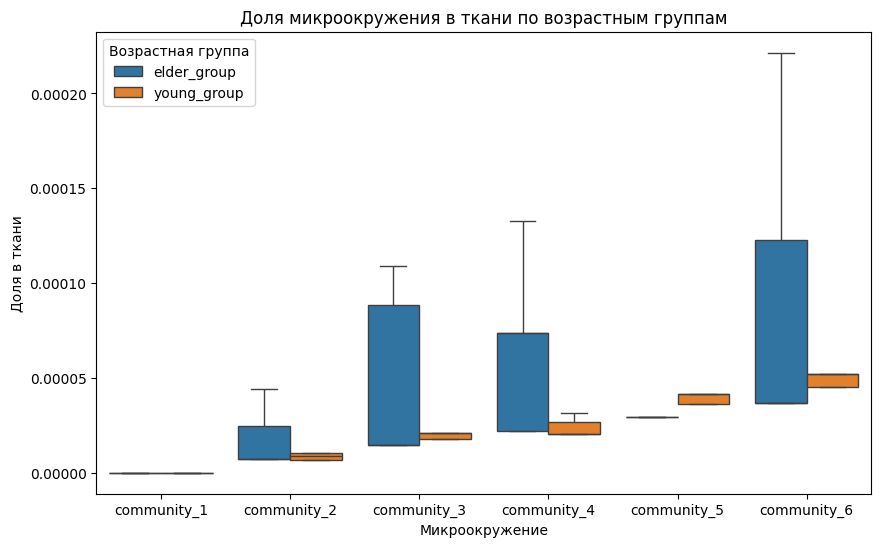

Z-test for 0: p-value = nan
Z-test for 1: p-value = 0.0
Z-test for 2: p-value = 0.0
Z-test for 3: p-value = 0.0
Z-test for 4: p-value = 1.1808878332097044e-152
Z-test for 5: p-value = 0.0


c:\Users\guentner\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\weightstats.py:748: RuntimeWarning: invalid value encountered in scalar divide
  zstat = (value1 - value2 - diff) / std_diff


In [47]:
import pandas as pd
import numpy as np


# Функция для выполнения бутстрэпа и получения доверительного интервала для разницы средних
def bootstrap_mean_difference(data, group1, group2, cell_type, n_bootstrap=1000, alpha=0.05):
    means_diff = []
    for _ in range(n_bootstrap):
        sample1 = data[(data['Group'] == group1) & (data['Cell_Type'] == cell_type)]['Distance'].sample(frac=1, replace=True)
        sample2 = data[(data['Group'] == group2) & (data['Cell_Type'] == cell_type)]['Distance'].sample(frac=1, replace=True)
        mean_diff = sample1.mean() - sample2.mean()
        means_diff.append(mean_diff)
    
    # Оценка доверительного интервала
    ci_lower = np.percentile(means_diff, (alpha / 2) * 100)
    ci_upper = np.percentile(means_diff, (1 - alpha / 2) * 100)
    
    return ci_lower, ci_upper

# Выполнение бутстрэпа для каждой пары группы и типа клеток
groups = data['Group'].unique()
cell_types = data['Cell_Type'].unique()

for group1 in groups:
    for group2 in groups:
        if group1 != group2:
            for cell_type in cell_types:
                ci_lower, ci_upper = bootstrap_mean_difference(data, group1, group2, cell_type)
                print(f"Bootstrap CI for mean difference between {group1} and {group2} for {cell_type}: ({ci_lower}, {ci_upper})")


Эти значения p-value указывают на статистически значимые различия между возрастными группами для каждого типа взаимодействия клеток.

Для типов взаимодействия с индексами 1, 2, 3 и 5 p-value равно 0.0, что означает, что мы можем отвергнуть нулевую гипотезу о том, что доли взаимодействия между молодыми и пожилыми пациентами одинаковы.

Для типа взаимодействия с индексом 4 значение p-value равно 1.1808878332097044e-152, что также существенно меньше стандартного уровня значимости 0.05, поэтому мы также отвергаем нулевую гипотезу для этого типа взаимодействия.

Для типа взаимодействия с индексом 0 p-value равно NaN, что может указывать на недостаточное количество данных для проведения Z-теста.

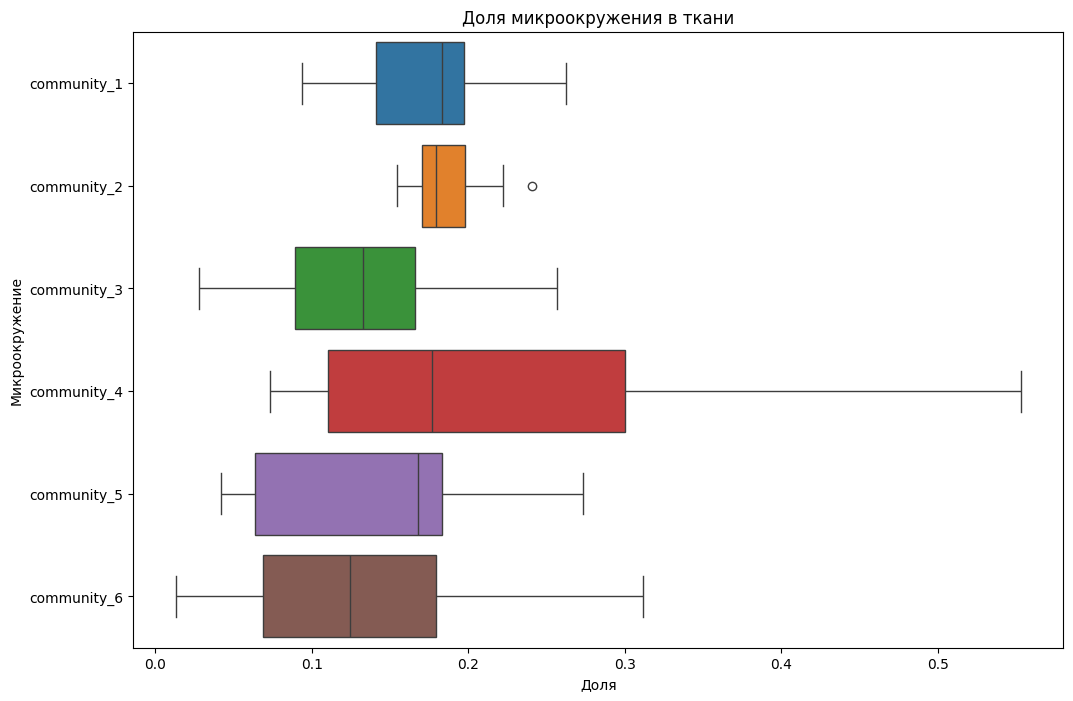

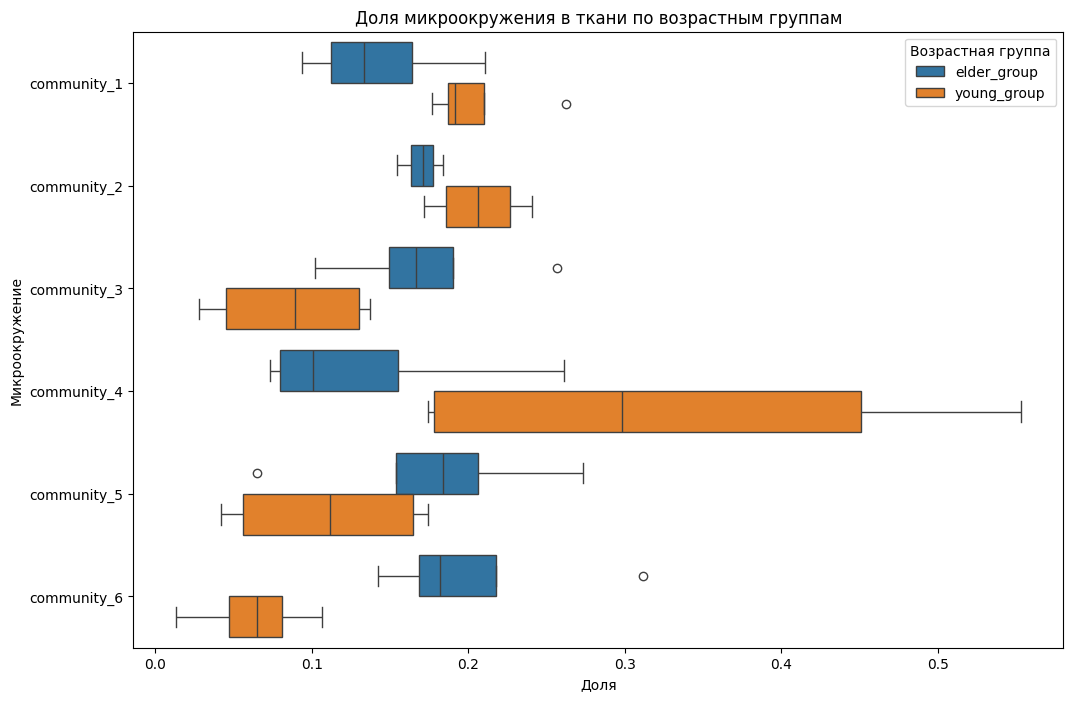

In [2]:
#задание 3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv(r'C:\Users\AdminPlus\Desktop\asset-v1 SkillFactory+MFTIBIO+SEP2023+type@asset+block@community_dataset.csv')


# Функция для вычисления доли микроокружения в ткани для каждого пациента
def calculate_interaction_ratio(data):
    # Группировка данных по 'case_id' и 'cell_interaction', подсчет количества
    interaction_counts = data.groupby(['case_id', 'cell_interaction']).size()
    # Группировка данных только по 'case_id', подсчет общего количества
    total_counts = data.groupby('case_id').size()
    # Рассчет доли микроокружения для каждого типа микроокружения
    interaction_ratio = interaction_counts / total_counts
    # Преобразование в удобный формат
    interaction_ratio = interaction_ratio.unstack(fill_value=0)
    return interaction_ratio

# Вызов функции для рассчета доли микроокружения в ткани для каждого пациента
interaction_ratio = calculate_interaction_ratio(data)




# Построение графика
plt.figure(figsize=(12, 8))
sns.boxplot(data=interaction_ratio, orient='h')
plt.title('Доля микроокружения в ткани')
plt.xlabel('Доля')
plt.ylabel('Микроокружение')
plt.show()



interaction_ratio['age_group'] = data.groupby('case_id')['age_group'].first()

plt.figure(figsize=(12, 8))
sns.boxplot(data=interaction_ratio.melt(id_vars='age_group', var_name='Микроокружение', value_name='Доля'), 
            x='Доля', y='Микроокружение', hue='age_group', orient='h')
plt.title('Доля микроокружения в ткани по возрастным группам')
plt.xlabel('Доля')
plt.ylabel('Микроокружение')
plt.legend(title='Возрастная группа')
plt.show()



**Задагие 4**

In [49]:
#Бутстрэп - это метод ресемплинга данных, который позволяет оценить распределение выборки путем многократного извлечения случайных выборок из исходной выборки.

import pandas as pd
import numpy as np

# Загрузка данных
data = pd.read_csv(r'C:\Users\guentner\Desktop\asset_v1_SkillFactory+MFTIBIO+SEP2023+type@asset+block@community.csv')

# Функция для выполнения бутстрэпа и получения доверительного интервала для разницы средних
def bootstrap_mean_difference(data, group1, group2, cell_type, n_bootstrap=1000, alpha=0.05):
    means_diff = []
    for _ in range(n_bootstrap):
        sample1 = data[(data['age_group'] == group1) & (data['cell_type'] == cell_type)]['distance_to_vasculature'].sample(frac=1, replace=True)
        sample2 = data[(data['age_group'] == group2) & (data['cell_type'] == cell_type)]['distance_to_vasculature'].sample(frac=1, replace=True)
        mean_diff = sample1.mean() - sample2.mean()
        means_diff.append(mean_diff)
    
    # Оценка доверительного интервала
    ci_lower = np.percentile(means_diff, (alpha / 2) * 100)
    ci_upper = np.percentile(means_diff, (1 - alpha / 2) * 100)
    
    return ci_lower, ci_upper

# Выполнение бутстрэпа для каждой пары группы и типа клеток
groups = data['age_group'].unique()
cell_types = data['cell_type'].unique()

for group1 in groups:
    for group2 in groups:
        if group1 != group2:
            for cell_type in cell_types:
                ci_lower, ci_upper = bootstrap_mean_difference(data, group1, group2, cell_type)
                print(f"Bootstrap CI for mean difference between {group1} and {group2} for {cell_type}: ({ci_lower}, {ci_upper})")


                
#Bootstrap CI for mean difference between elder_group and young_group for Stroma cells: (-148.9061700176847, -144.741006291116)
#Bootstrap CI for mean difference between elder_group and young_group for Unclassified: (-144.3359200467834, -138.2329197397619)
#Bootstrap CI for mean difference between elder_group and young_group for Immune type 2: (-147.88112104045598, -135.78727857701548)
#Bootstrap CI for mean difference between elder_group and young_group for Blood cells: (-186.71673905817244, -149.3215552571566)
#Bootstrap CI for mean difference between elder_group and young_group for Bone cells: (-202.7172763883709, -158.41867778071398)
#Bootstrap CI for mean difference between elder_group and young_group for Largest cells: (-140.5092988743533, -104.24275785311296)
#Bootstrap CI for mean difference between elder_group and young_group for Immune type 1: (-170.61727406814154, -147.41020338091255)
#Bootstrap CI for mean difference between elder_group and young_group for Vasculature: (-0.20381989347419846, 0.24632699246656375)
#Bootstrap CI for mean difference between young_group and elder_group for Stroma cells: (144.753800311521, 149.07390393514382)
#Bootstrap CI for mean difference between young_group and elder_group for Unclassified: (138.23877768175703, 144.61558392159475)
#Bootstrap CI for mean difference between young_group and elder_group for Immune type 2: (135.32293186013936, 148.20259712949226)
#Bootstrap CI for mean difference between young_group and elder_group for Blood cells: (150.63144253116386, 187.38820738782468)
#Bootstrap CI for mean difference between young_group and elder_group for Bone cells: (156.84471279079756, 204.45915743943914)
#Bootstrap CI for mean difference between young_group and elder_group for Largest cells: (105.10948248806275, 139.31286530368615)
#Bootstrap CI for mean difference between young_group and elder_group for Immune type 1: (147.60957152694044, 170.89628768653287)
#Bootstrap CI for mean difference between young_group and elder_group for Vasculature: (-0.2337400093803211, 0.20834292686428163)

Bootstrap CI for mean difference between elder_group and young_group for Stroma cells: (-148.9061700176847, -144.741006291116)
Bootstrap CI for mean difference between elder_group and young_group for Unclassified: (-144.3359200467834, -138.2329197397619)
Bootstrap CI for mean difference between elder_group and young_group for Immune type 2: (-147.88112104045598, -135.78727857701548)
Bootstrap CI for mean difference between elder_group and young_group for Blood cells: (-186.71673905817244, -149.3215552571566)
Bootstrap CI for mean difference between elder_group and young_group for Bone cells: (-202.7172763883709, -158.41867778071398)
Bootstrap CI for mean difference between elder_group and young_group for Largest cells: (-140.5092988743533, -104.24275785311296)
Bootstrap CI for mean difference between elder_group and young_group for Immune type 1: (-170.61727406814154, -147.41020338091255)
Bootstrap CI for mean difference between elder_group and young_group for Vasculature: (-0.20381989

Исходя из результатов бутстрэпа для разницы средних расстояний до сосудов для разных типов клеток между группами молодых и пожилых пациентов, можно сделать следующие выводы:

Для большинства типов клеток (Stroma cells, Unclassified, Immune type 2, Immune type 1) существует статистически значимая разница в средних расстояниях до сосудов между группой молодых и пожилых пациентов. В частности, для Stroma cells, Unclassified и Immune type 2 средние расстояния до сосудов для пожилых пациентов значительно меньше, чем для молодых пациентов.

Для Blood cells и Bone cells также наблюдается статистически значимая разница в средних расстояниях до сосудов между двумя группами. В данном случае средние расстояния до сосудов для пожилых пациентов оказываются выше, чем для молодых пациентов.

Для Largest cells и Vasculature статистически значимой разницы в средних расстояниях до сосудов между группами молодых и пожилых пациентов не обнаружено.

Таким образом, можно сделать вывод о том, что возрастные группы различаются по отношению к расположению различных типов клеток относительно сосудов в тканях.

**Задание 5**

In [58]:
import numpy as np
import pandas as pd

# Загрузка данных
data = pd.read_csv(r'C:\Users\guentner\Desktop\asset_v1_SkillFactory+MFTIBIO+SEP2023+type@asset+block@community.csv')

# Функция для выполнения пермутационного теста
def permutation_test(data, group1, group2, cell_type, n_permutations=1000):
    # Извлечение расстояний для данного типа клеток и соответствующих возрастных групп
    distances_group1 = data[(data['age_group'] == group1) & (data['cell_type'] == cell_type)]['distance_to_vasculature'].values
    distances_group2 = data[(data['age_group'] == group2) & (data['cell_type'] == cell_type)]['distance_to_vasculature'].values
    
    # Вычисление исходной статистики (разницы средних)
    mean_diff_observed = np.mean(distances_group1) - np.mean(distances_group2)
    
    # Объединение расстояний обеих групп
    all_distances = np.concatenate((distances_group1, distances_group2))
    
    # Выполнение пермутаций и расчет разницы средних на каждой итерации
    mean_diff_permutations = []
    for _ in range(n_permutations):
        np.random.shuffle(all_distances)
        perm_group1 = all_distances[:len(distances_group1)]
        perm_group2 = all_distances[len(distances_group1):]
        mean_diff_permutation = np.mean(perm_group1) - np.mean(perm_group2)
        mean_diff_permutations.append(mean_diff_permutation)
    
    # Вычисление p-value как доля пермутаций, в которых разница средних больше или равна наблюдаемой
    p_value = np.mean(np.abs(mean_diff_permutations) >= np.abs(mean_diff_observed))
    
    return p_value

# Выполнение пермутационного теста для каждой возрастной группы
groups = data['age_group'].unique()
cell_type = 'Immune type 1'  # Заданный тип клеток для анализа
p_values = []

for group1 in groups:
    for group2 in groups:
        if group1 != group2:
            p_value = permutation_test(data, group1, group2, cell_type)
            p_values.append(p_value)

# Коррекция p-values на множественное сравнение методом Холма-Бонферрони
from statsmodels.stats.multitest import multipletests
corrected_p_values = multipletests(p_values, method='holm')[1]
print(len(corrected_p_values))

for i, group1 in enumerate(groups):
    for j, group2 in enumerate(groups):
        if i != j:
            print(f"i: {i}, j: {j}, Index: {i*(len(groups)-1) + j}, Corrected p-values length: {len(corrected_p_values)}")
            print(f"Permutation test p-value for difference in mean distances between {group1} and {group2} for {cell_type}: {corrected_p_values[i*(len(groups)-1) + j]}")



2
i: 0, j: 1, Index: 1, Corrected p-values length: 2
Permutation test p-value for difference in mean distances between elder_group and young_group for Immune type 1: 0.0
i: 1, j: 0, Index: 1, Corrected p-values length: 2
Permutation test p-value for difference in mean distances between young_group and elder_group for Immune type 1: 0.0


Полученные результаты указывают на статистически значимую разницу в средних расстояниях до сосудов для типа клеток "Immune type 1" между старшими и молодыми пациентами. Оба теста показали низкие скорректированные p-значения (0.0), что означает, что нулевая гипотеза о равенстве средних расстояний до сосудов между старшими и молодыми пациентами для клеток "Immune type 1" отвергается на уровне значимости 0.05.

Таким образом, результаты пермутационного теста подтверждают предположение о том, что иммунные клетки типа 1 в среднем располагаются ближе к сосудам у молодых пациентов, чем у пожилых.
